In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [322]:
def get_kernel_for_term(term, t):
    ar, br, ai, bi = term
    return ar*np.exp(-br*np.abs(t))*np.cos(bi*np.abs(t)) + ai*np.exp(-br*np.abs(t))*np.sin(bi*np.abs(t))

def get_polys_for_term(term):
    ar, br, ai, bi = term
    num = np.array([
        ar*br - ai*bi,
        (ar*br + ai*bi) * (br*br + bi*bi),
    ])
    num *= np.sqrt(2.0 / np.pi)
    denom = np.array([
        1.0,
        2.0*(br*br - bi*bi),
        (br*br + bi*bi)**2,
    ])
    return num, denom

def get_psd_for_term(term, w):
    num, denom = get_polys_for_term(term)
    return np.polyval(num, w**2) / np.polyval(denom, w**2)

def get_poly_for_sum_of_terms(terms):
    polys = list(map(get_polys_for_term, terms))
    numerator = np.array([0.0])
    denominator = np.array([1.0])
    for i in range(len(polys)):
        denominator = np.polymul(denominator, polys[i][1])
        num = np.array(polys[i][0])
        for j in range(len(polys)):
            if i == j:
                continue
            num = np.polymul(num, polys[j][1])
        numerator = np.polyadd(numerator, num)
    return numerator, denominator

In [323]:
terms = 1.0 - 2.0 * np.random.rand(1, 4)
print(sum(get_psd_for_term(term, 0.0) for term in terms))

-0.0636046576785


In [324]:
num, denom = get_poly_for_sum_of_terms(terms)
print(np.polyval(num, 0.0) / np.polyval(denom, 0.0))

-0.0636046576785


In [325]:
full_poly = num
roots = np.roots(full_poly)

def get_sturm_sequence(poly):
    p0 = np.atleast_1d(poly)
    p1 = np.polyder(poly)
    sequence = [p0, p1]
    for k in range(len(poly)+1):
        q, rem = np.polydiv(p0, p1)
        p0 = np.array(p1)
        p1 = -rem
        sequence.append(p1)
        if len(p1) == 1:
            break
    return sequence

def count_sign_changes(seq, x):
    count = 0
    sgn = 0
    for p in seq:
        if np.isfinite(x):
            v = np.polyval(p, x)
            s = np.sign(v)
        else:
            s = np.sign(p[0]) * np.sign(x**(len(p)-1))
        if sgn == 0:
            sgn = s
        elif s != sgn:
            count += 1
        sgn = s
    return count

seq = get_sturm_sequence(full_poly)
# print(seq)
# seq = get_sturm_sequence(np.array([1., 1., 0., -1., -1.]))
print(sum(v.real > 0 and np.allclose(v.imag, 0.0) for v in roots))
count_sign_changes(seq, 0.) - count_sign_changes(seq, np.inf)

0


0

In [326]:
roots

array([-0.70870525])

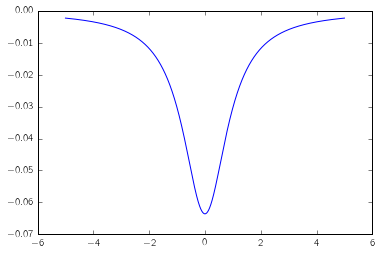

In [327]:
w = np.linspace(-5, 5, 5000)
p = np.zeros_like(w)
for term in terms:
    p += get_psd_for_term(term, w)
plt.plot(w, p)
plt.gca().axhline(0.0)
#plt.ylim(-1, 1)
#plt.plot(w, np.polyval(full_poly, w**2))

In [328]:
p[-1]

-0.0022217020970006973